In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as reader
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

ls_ret = pd.read_pickle("long_short_returns.pkl")
ls_ret = pd.DataFrame(ls_ret)
RF = pd.read_pickle("RF.pkl")
TB = pd.read_csv('Data/GS1M.csv', parse_dates=['observation_date'], index_col='observation_date')
ls_ret.index = ls_ret.index.to_timestamp()
TB = TB/100


df = pd.concat([ls_ret, TB], axis=1, join='inner')
df.head()


,long_short_ret,GS1M
2001-07-01,0.088118,0.0367
2001-08-01,0.074600,0.0353
2001-09-01,0.092800,0.0268
2001-10-01,-0.114083,0.0227
2001-11-01,-0.076671,0.0199


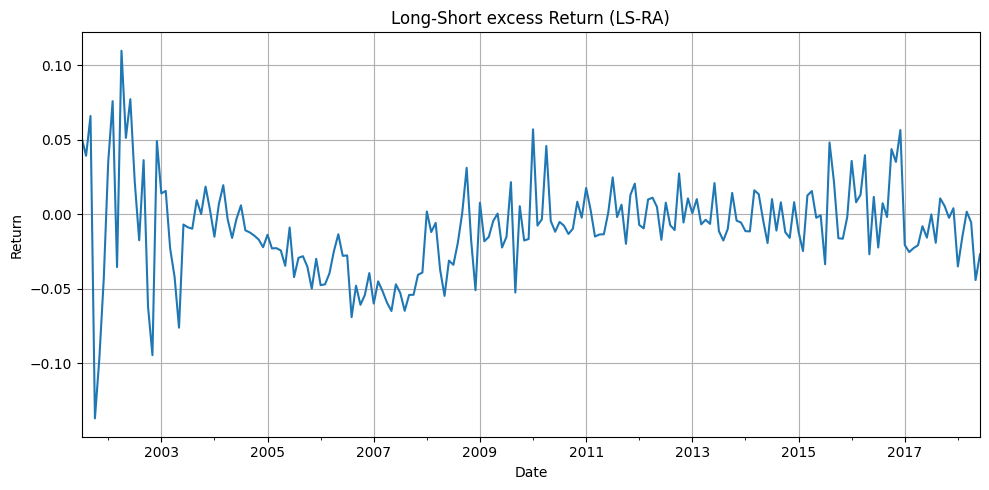

In [67]:
ls_ret_excess = df['long_short_ret']-df['GS1M']
ls_ret_excess


# Plot the single time series
ls_ret_excess.plot(figsize=(10, 5), legend=False)
# Add title and axis labels
plt.title('Long-Short excess Return (LS-RA)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.tight_layout()

plt.show()


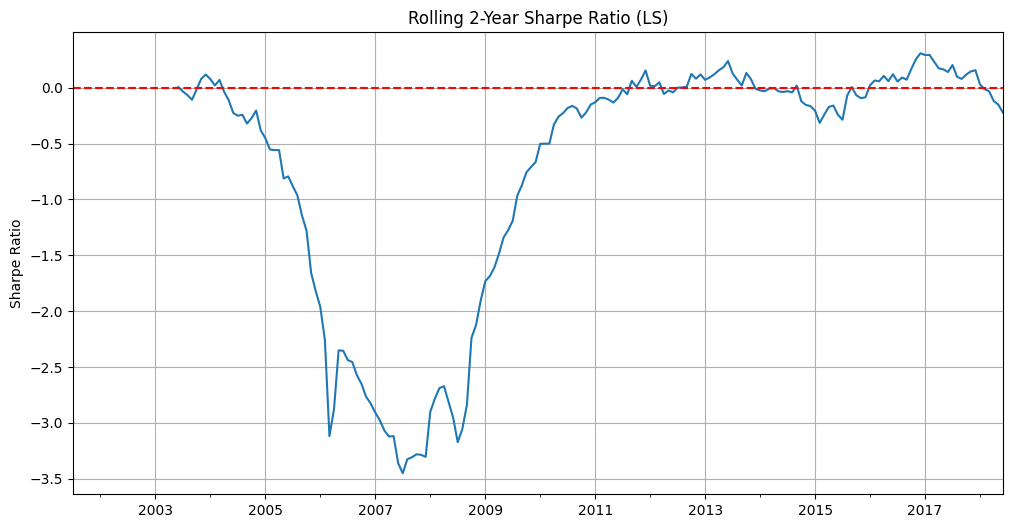

In [74]:
#Rolling average Sharpe-Ratios

rolling_mean = ls_ret_excess.rolling(window=24).mean()
rolling_std = df['long_short_ret'].rolling(window=24).std()
rolling_sharpe = rolling_mean / rolling_std

rolling_sharpe.plot(figsize=(12, 6), title='Rolling 2-Year Sharpe Ratio (LS)')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

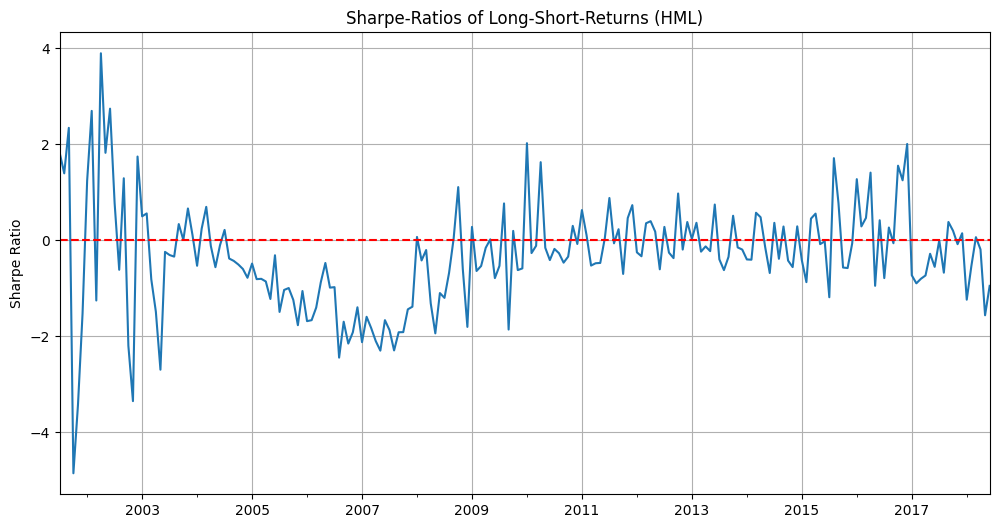

In [73]:
#Sharpe Ratios
sharpe_ratio = ls_ret_excess/df['long_short_ret'].std()



sharpe_ratio.plot(figsize=(12, 6), title='Sharpe-Ratios of Long-Short-Returns (HML)')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()

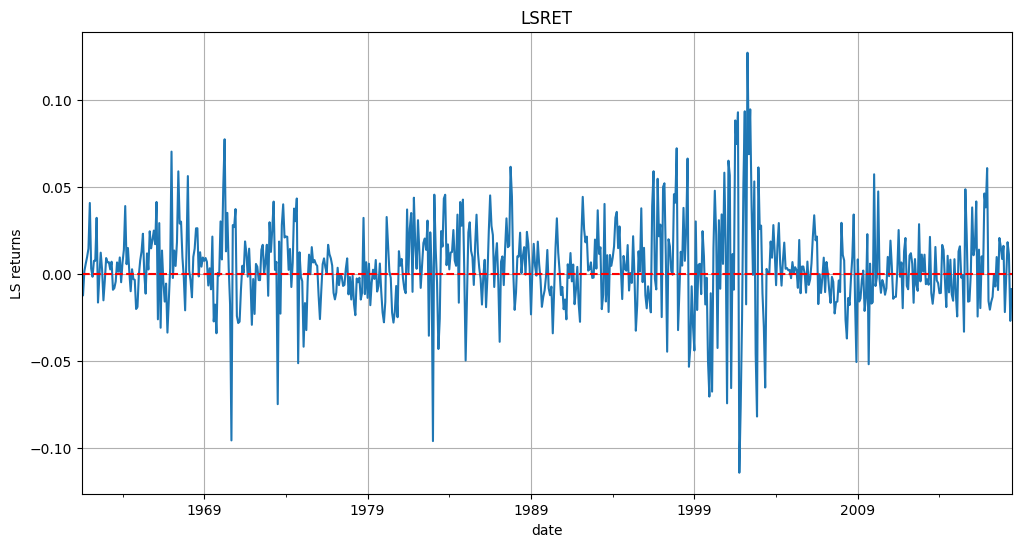

0.047876692508598266


In [37]:
ls_ret.plot(figsize=(12, 6), title='LSRET')
plt.axhline(0, color='red', linestyle='--')
plt.ylabel('LS returns')
plt.grid(True)
plt.show()

print(ls_ret.mean() * 12)  # Annualized
